### Exploratory Data Analysis

- Problem Identification

- Data Wrangling

- Data Collection
- Data Organization
- Data Definition
- Data Cleaning
- Outliers
- Exploratory Data Analysis

- Build data profile tables and plots
- Outliers & Anomalies
- Explore data relationships
- Identification and creation of features
- Pre-processing and Training Data Development

In [3]:
## Data Analysis Phase
import pandas as pd
import numpy as np

import sklearn 
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from datetime import timedelta

# Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Final Project Clean.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                     -1.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                    -1.0               1                -1.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [5]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int64  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int64  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int64  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  float64
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  int64  
 12  Browser                  11248 non-null  int64  
 13  Region                   11248 non-null  int64  
 14  TrafficType           

### Feature Selection

In [6]:
le = LabelEncoder()
cats = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Month',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend',
    'Revenue'
    ]

for feature in cats:
    df[feature] = le.fit_transform(df[feature])

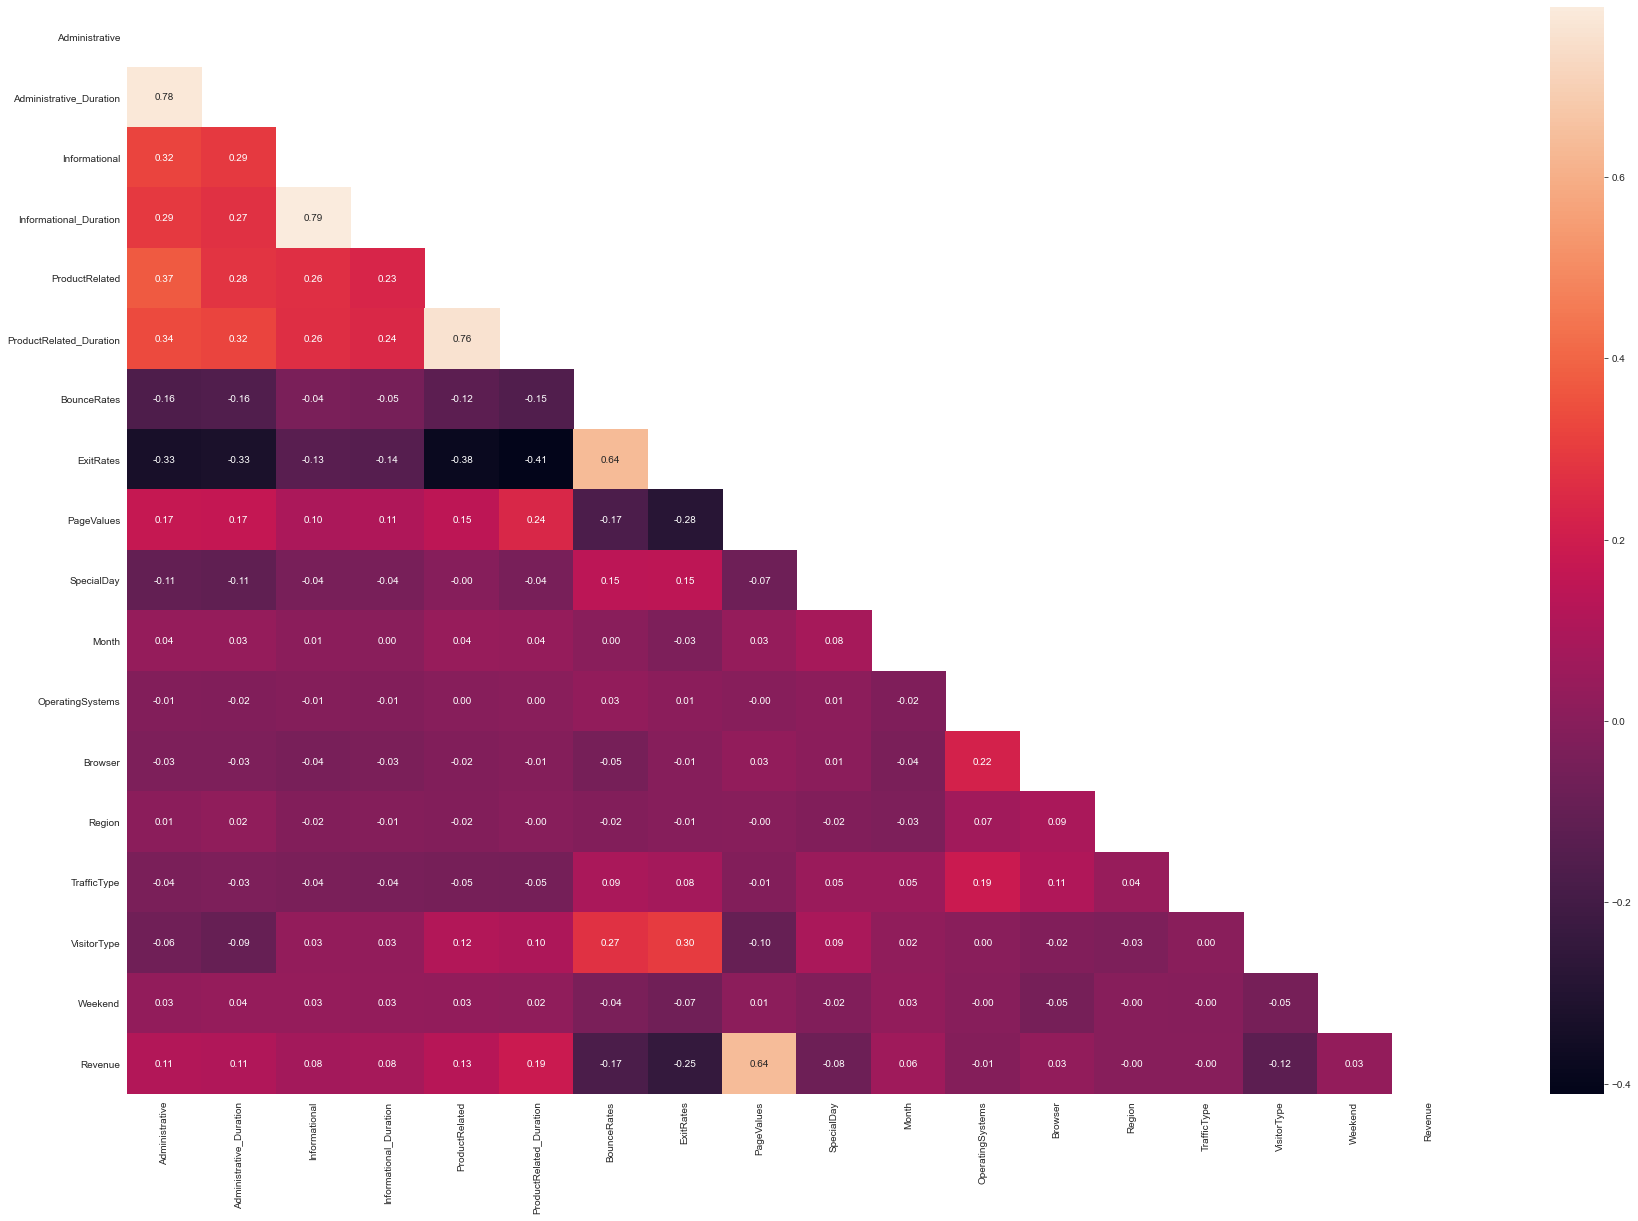

In [7]:
plt.figure(figsize = (30,20))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, fmt='.2f')
plt.savefig('heatmap.png')

**Insights:**

> - There is a high correlation with page values and revenue
> - Bounces rates and Exit rates got negative influence on revenue
> - Pages which has high bounce rates tends to have high exit rates as well
> - The website earns a lot of revenue from product related pages

In [8]:
# categorical feature
df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [9]:
#int features
df['Administrative'] = df['Administrative'].astype('int')
df['Informational'] = df['Informational'].astype('int')
df['ProductRelated'] = df['ProductRelated'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Administrative           11248 non-null  int64 
 1   Administrative_Duration  11248 non-null  int64 
 2   Informational            11248 non-null  int64 
 3   Informational_Duration   11248 non-null  int64 
 4   ProductRelated           11248 non-null  int64 
 5   ProductRelated_Duration  11248 non-null  int64 
 6   BounceRates              11248 non-null  int64 
 7   ExitRates                11248 non-null  int64 
 8   PageValues               11248 non-null  int64 
 9   SpecialDay               11248 non-null  object
 10  Month                    11248 non-null  object
 11  OperatingSystems         11248 non-null  object
 12  Browser                  11248 non-null  object
 13  Region                   11248 non-null  object
 14  TrafficType              11248 non-nul

In [11]:
minmax = pd.DataFrame(df.iloc[:, list(range(10))].min())
minmax['Max'] = df.iloc[:, list(range(10))].max()
minmax.columns = ['Min', 'Max']
minmax

Min     Max
Administrative           0.0    23.0
Administrative_Duration  0.0  2849.0
Informational            0.0    13.0
Informational_Duration   0.0   974.0
ProductRelated           0.0   152.0
ProductRelated_Duration  0.0  8600.0
BounceRates              0.0  1328.0
ExitRates                0.0  3898.0
PageValues               0.0  2220.0
SpecialDay               0.0     5.0

In [12]:
df.shape

(11248, 18)

### Uni-Variate Analysis of the Data

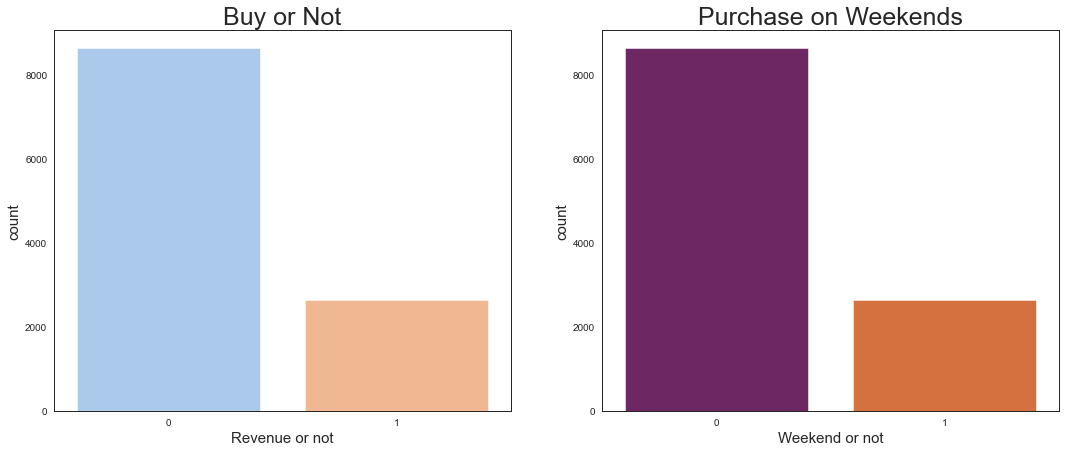

In [37]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 25)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 25)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.savefig('2.1.png')

plt.show()

In [14]:
df['VisitorType'].value_counts()

2    9496
0    1674
1      78
Name: VisitorType, dtype: int64

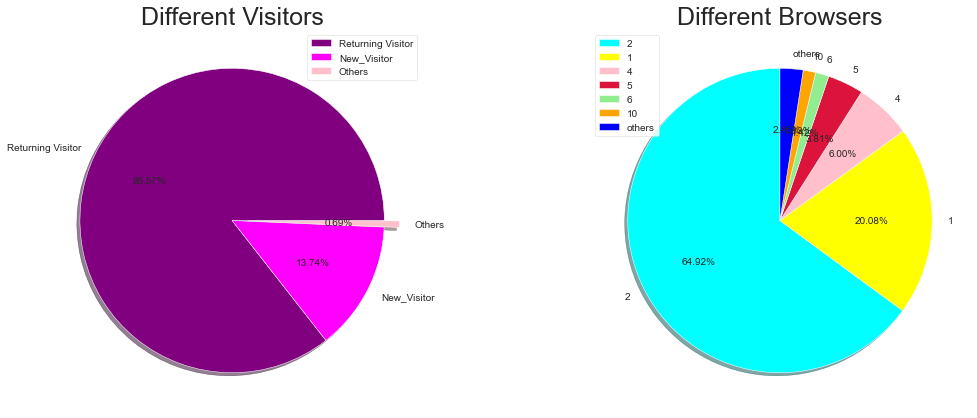

In [38]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['purple', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 25)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['cyan', 'yellow', 'pink', 'crimson', 'lightgreen', 'orange', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 25)
plt.axis('off')
plt.legend()
plt.savefig('2.2.png')


plt.show()

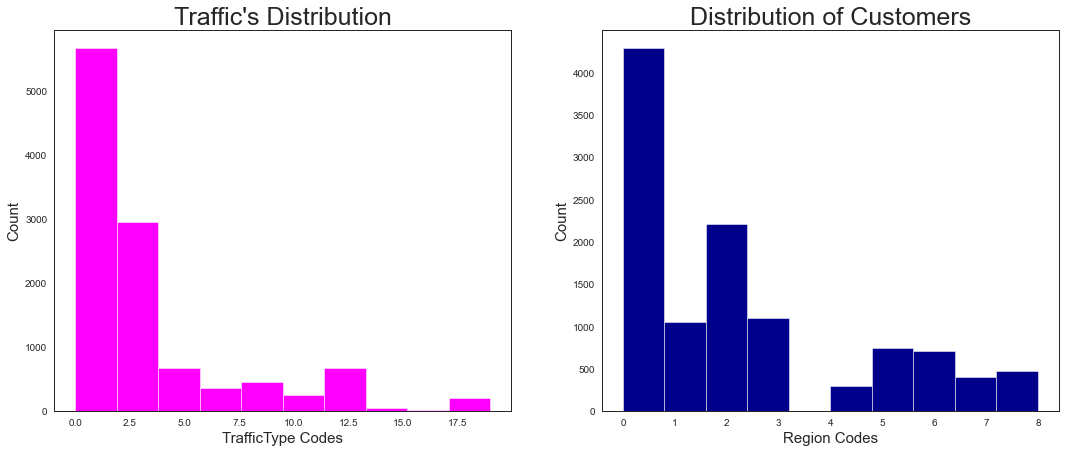

In [39]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'magenta')
plt.title("Traffic's Distribution",fontsize = 25)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(df['Region'], color = 'darkblue')
plt.title('Distribution of Customers',fontsize = 25)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('2.3.png')

plt.show()

In [17]:
# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

1    5859
0    2454
2    2392
3     440
7      73
5      18
6       6
4       6
Name: OperatingSystems, dtype: int64

In [18]:
#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()

6    3170
7    2527
5    1794
1    1598
8     509
9     412
0     399
3     398
4     262
2     179
Name: Month, dtype: int64

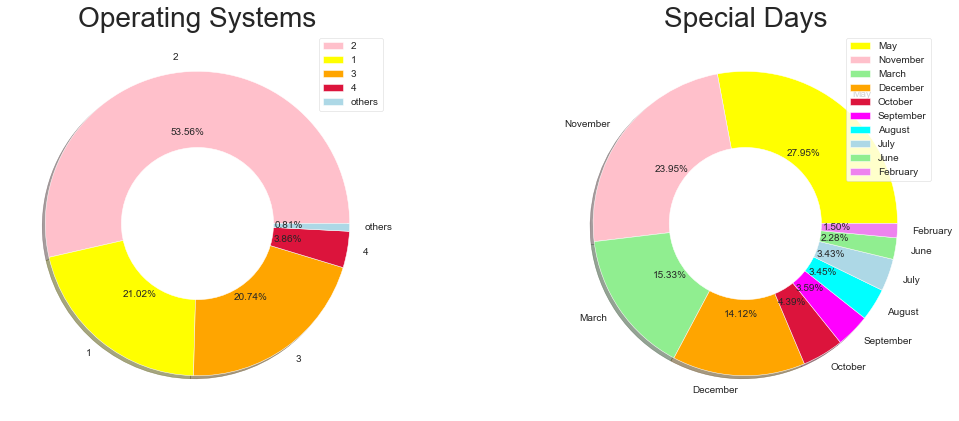

In [40]:
# creating a donut chart for the months variations

size = [6599, 2590, 2555, 476, 100]
colors = ['pink', 'yellow', 'orange', 'crimson', 'lightblue']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Operating Systems', fontsize = 28)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3500, 3000, 1920, 1768, 550, 450, 432, 430, 286, 188]
colors = ['yellow', 'pink', 'lightgreen', 'orange', 'crimson', 'magenta', 'cyan', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 28)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.savefig('2.4.png')

plt.show()

### Bi-Variate Analysis

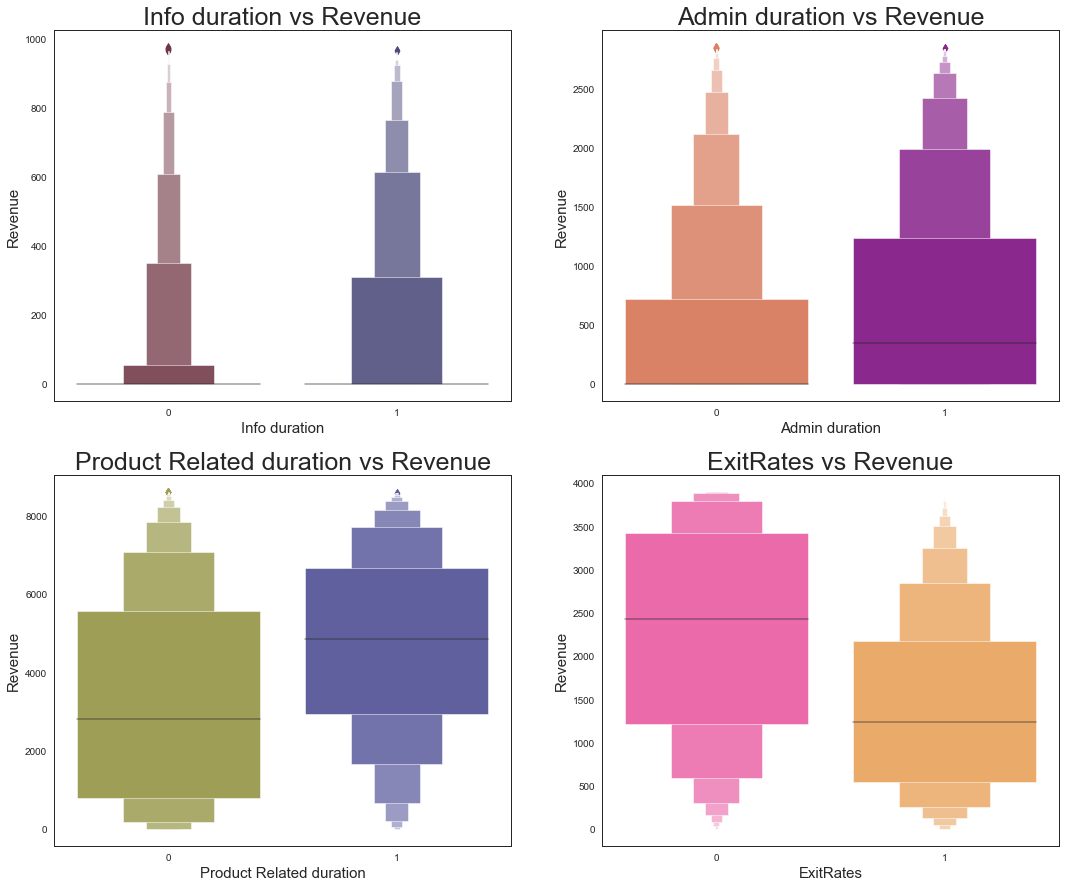

In [41]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'icefire_r')
plt.title('Info duration vs Revenue', fontsize = 25)
plt.xlabel('Info duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'plasma_r')
plt.title('Admin duration vs Revenue', fontsize = 25)
plt.xlabel('Admin duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'gist_stern_r')
plt.title('Product Related duration vs Revenue', fontsize = 25)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 25)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.savefig('3.1.png')

plt.show()

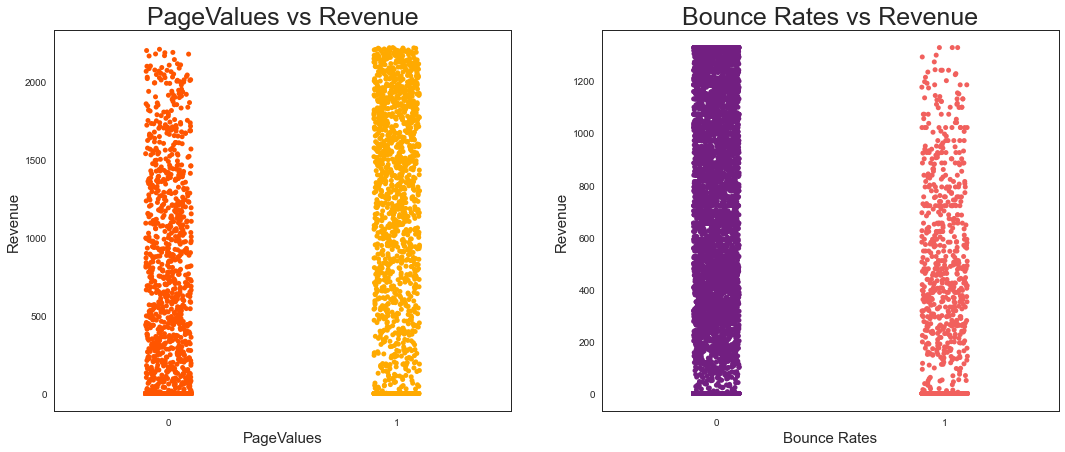

In [42]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 25)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 25)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.savefig('3.2.png')

plt.show()

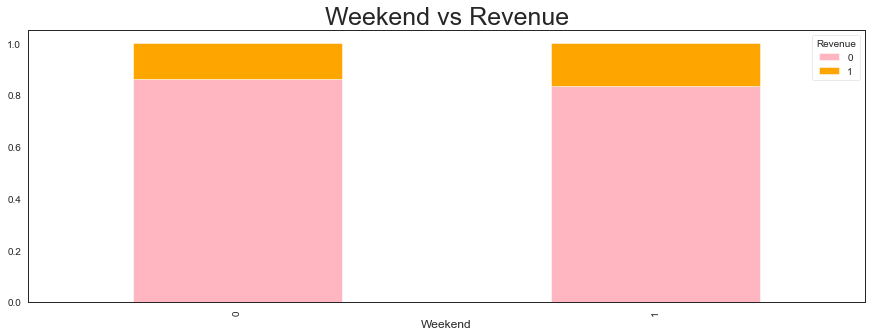

In [43]:
# weekend vs Revenue

df2 = pd.crosstab(df['Weekend'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'orange'])
plt.title('Weekend vs Revenue', fontsize = 25)
plt.savefig('3.3.png')

plt.show()

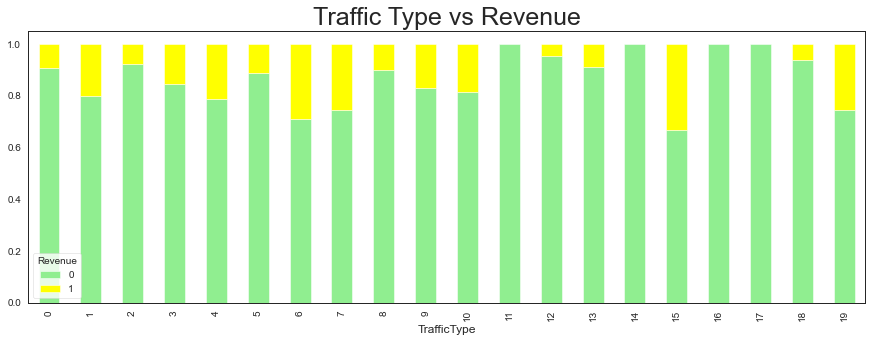

In [44]:
# Traffic Type vs Revenue

df3 = pd.crosstab(df['TrafficType'], df['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.savefig('3.4.png')

plt.show()

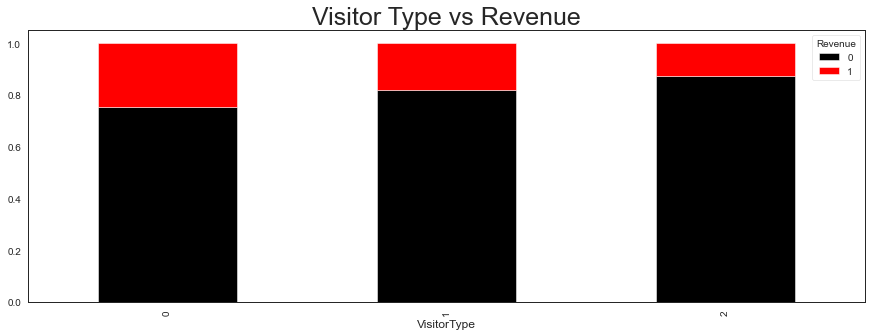

In [45]:
# visitor type vs revenue

df4 = pd.crosstab(df['VisitorType'], df['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['black', 'red'])
plt.title('Visitor Type vs Revenue', fontsize = 25)
plt.savefig('3.5.png')

plt.show()

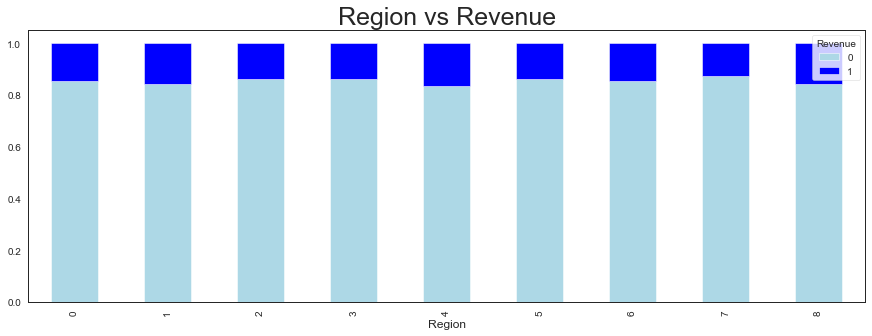

In [46]:
# region vs Revenue

df5 = pd.crosstab(df['Region'], df['Revenue'])
df5.div(df5.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 25)
plt.savefig('3.6.png')

plt.show()

### Multi-Variate Analysis

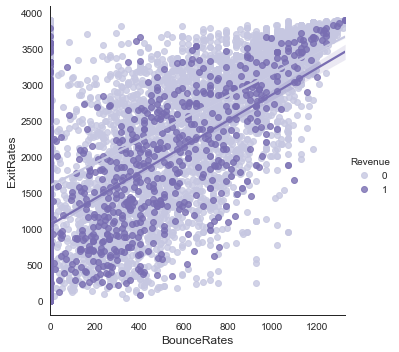

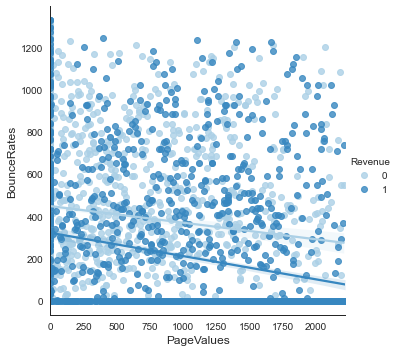

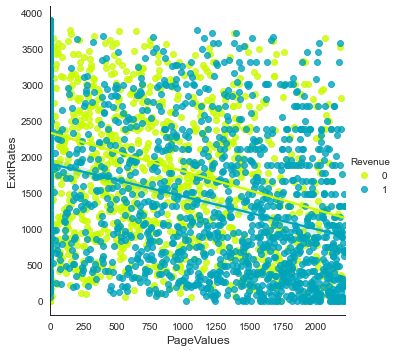

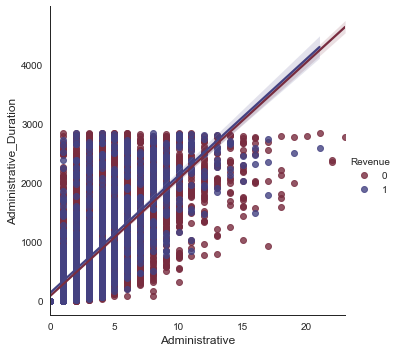

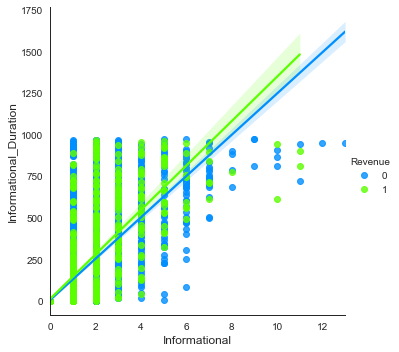

In [47]:
ax1 = sns.lmplot('BounceRates','ExitRates',hue='Revenue', data=df, palette='Purples')
ax2 = sns.lmplot('PageValues','BounceRates',hue='Revenue', data=df, palette='Blues')
ax3 = sns.lmplot('PageValues','ExitRates', hue='Revenue', data=df, palette='nipy_spectral_r')
ax4 = sns.lmplot('Administrative', 'Administrative_Duration', hue='Revenue', data=df, palette='icefire_r')
ax5 = sns.lmplot('Informational', 'Informational_Duration', hue='Revenue', data=df, palette='gist_rainbow_r')
plt.savefig('4.1.png')

plt.show()

- Exit Rates and Bounce Rates are positively correlated with the correlation coefficient of 0.90.
- Bounce Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.
- Exit Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.
- Administrative Pages and Administrative Duration, Informational and Informational Duration, Product Related and Product Related Duration are positively correlated.
- On administrative pages 2 to 15 such as login, logout, password recovery, profile, email wish list etc., visitors have spent more than 500 seconds (approx. 8 minutes) which is generally quite higher than normal. It suggests that visitors are having trouble logging in or it’s taking too much time to process the request.
- Even though customers/visitors have spent a large amount of time on product related pages but the revenue generation is very low. There are certain outliers who did spent more than 30000 seconds (approx. 8 Hours) but still didn’t make any transaction.
- With increasing Page Values, the revenue generation is more. There are certain pages which have very less page values which need to be improved in order to generate revenue.

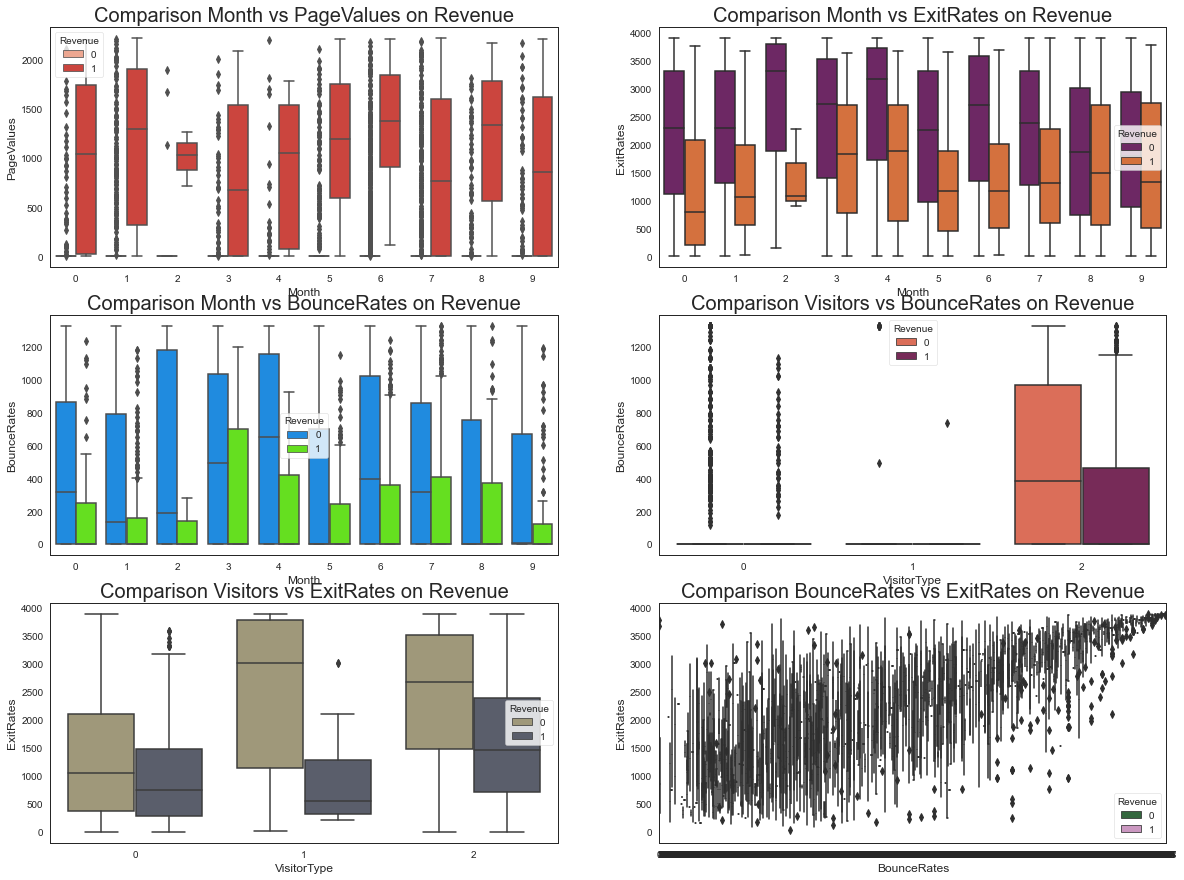

In [48]:
# month vs pagevalues with respect to revenue

plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(3, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'Reds')
plt.title('Comparison Month vs PageValues on Revenue', fontsize = 20)

# month vs exitrates with respect to revenue
plt.subplot(3, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'inferno')
plt.title('Comparison Month vs ExitRates on Revenue', fontsize = 20)

# month vs bouncerates with respect to revenue
plt.subplot(3, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'gist_rainbow_r')
plt.title('Comparison Month vs BounceRates on Revenue', fontsize = 20)

# visitor type vs Bounce rates with respect to revenue
plt.subplot(3, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'rocket_r')
plt.title('Comparison Visitors vs BounceRates on Revenue', fontsize = 20)

# visitor type vs Exit rates with respect to revenue
plt.subplot(3, 2, 5)
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'cividis_r')
plt.title('Comparison Visitors vs ExitRates on Revenue', fontsize = 20)

# Bounce Rates vs Exit rates with respect to revenue
plt.subplot(3, 2, 6)
sns.boxplot(x = df['BounceRates'], y = df['ExitRates'], hue = df['Revenue'], palette = 'cubehelix')
plt.title('Comparison BounceRates vs ExitRates on Revenue', fontsize = 20)
plt.savefig('4.2.png')

plt.show()

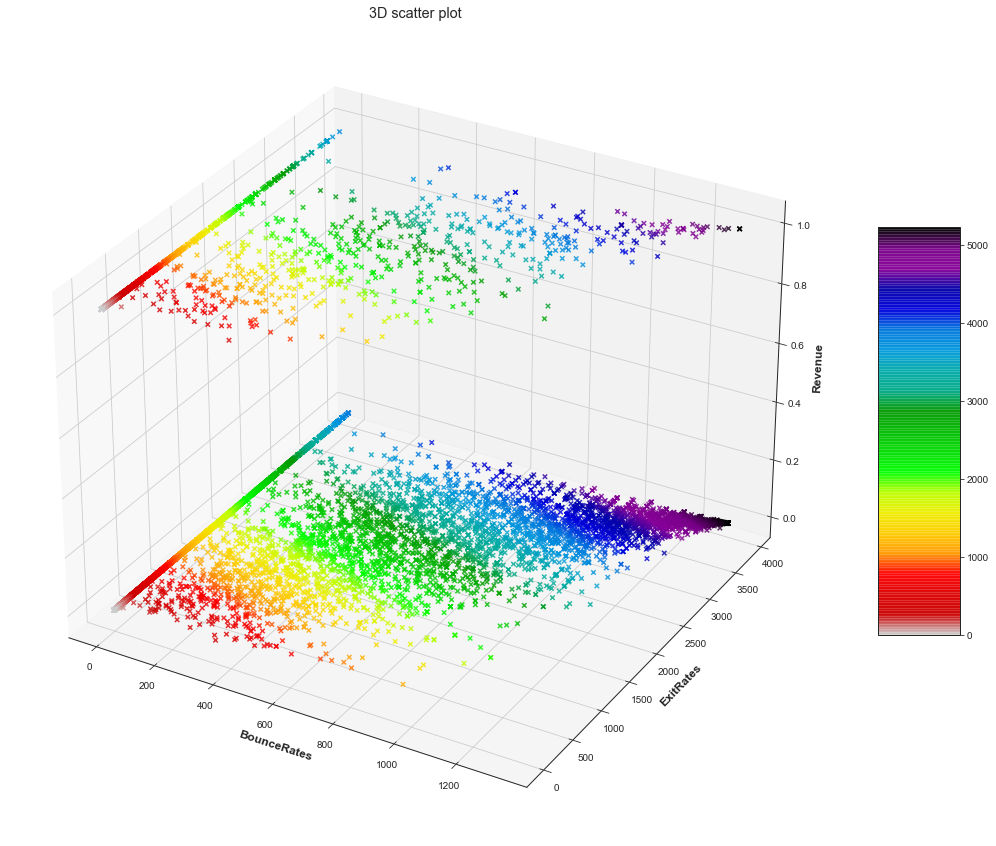

In [49]:
# Import libraries 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Creating dataset 
z = df['Revenue']
x = df['BounceRates']
y = df['ExitRates']
  
# Creating figure 
fig = plt.figure(figsize = (20, 15)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  

# Creating color map 
my_cmap = plt.get_cmap('nipy_spectral_r') 
  
# Creating plot 
sctt = ax.scatter3D(x, y, z, 
                    alpha = 0.8, 
                    c = (x + y + z),  
                    cmap = my_cmap,  
                    marker ='x') 
  
plt.title("3D scatter plot") 
ax.set_xlabel('BounceRates', fontweight ='bold')  
ax.set_ylabel('ExitRates', fontweight ='bold')  
ax.set_zlabel('Revenue', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.savefig('4.3.png')
  
# show plot 
plt.show()

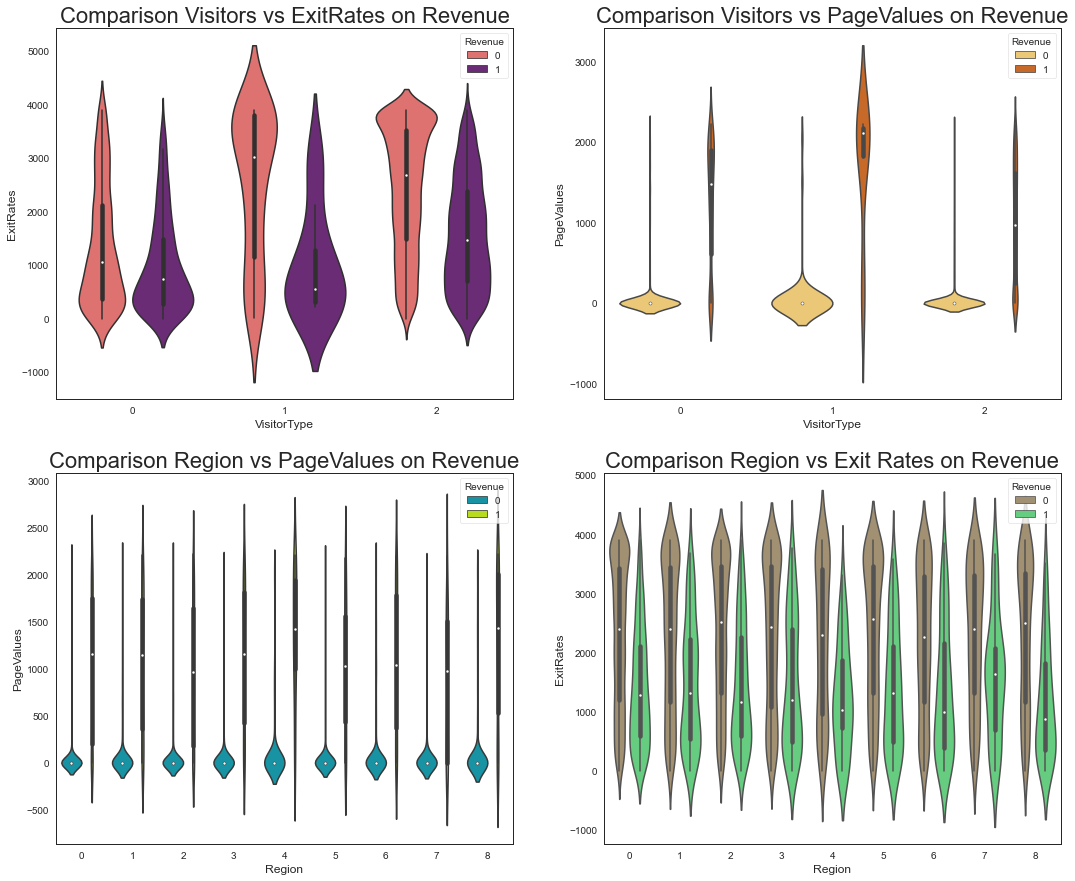

In [50]:
# visitor type vs exit rates with respect to revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'magma_r')
plt.title('Comparison Visitors vs ExitRates on Revenue', fontsize = 22)

# visitor type vs exit rates with respect to revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'YlOrBr')
plt.title('Comparison Visitors vs PageValues on Revenue', fontsize = 22)

# region vs pagevalues with respect to revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'nipy_spectral')
plt.title('Comparison Region vs PageValues on Revenue', fontsize = 22)

#region vs exit rates with respect to revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'terrain_r')
plt.title('Comparison Region vs Exit Rates on Revenue', fontsize = 22)
plt.savefig('4.4.png')

plt.show()

Few observations,

- There is hardly any shopping on or the day's approching any special day May, November, March and December have peak. 
- There are 2 opportunity windows, March, May and November 
- December Even if on surface it looks like there is more sale during Weekdays, but during Weekends customers seem to buy more wrt visiting the site
Browser 2, seems to have a lot of potential.

### Relationship between Variables

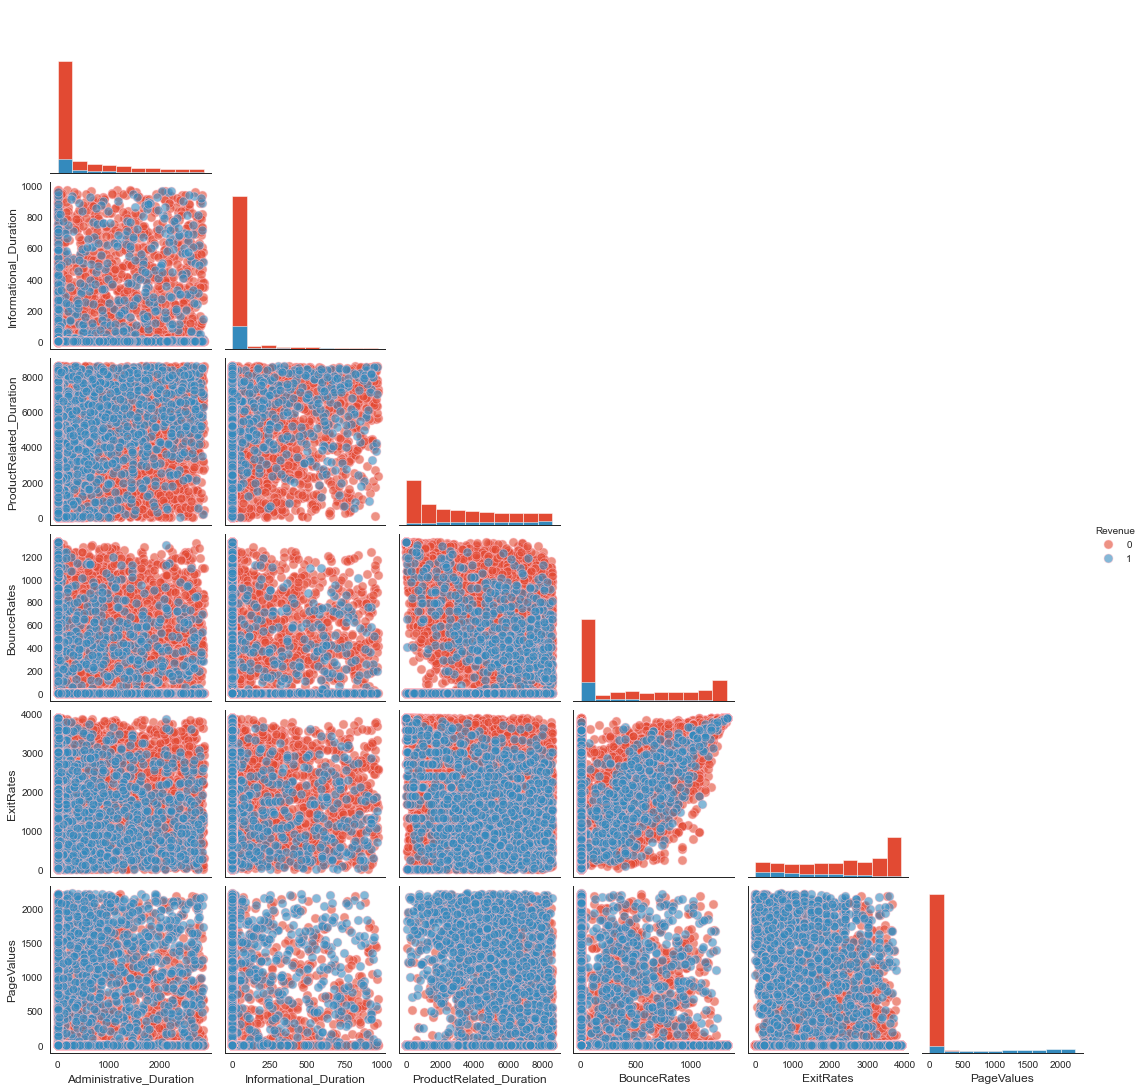

In [30]:
g = sns.pairplot(df
                 ,vars = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
                 ,hue = 'Revenue'
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'pink'}
                 ,corner=True)
plt.savefig('1.1.png')

### INSIGHT:

1. Bounce rates are strongly correlated with exit rates.
2. PageValue is one of the most significant features that lead to revenue.
3. Returning visitors are checking to see if the prices of the products have changed. We can closely monitor the changes to these products. 
4. The website gets most of its traffic from type 1,2 and 3.
5. Traffic type 2 yields the highest revenue of all channels. 
6. Traffic type 13 has a considerably high no. of sessions that do not generate revenue. 
7. From the above plots we can see that, the time spent by visitors pages are related to number of pages.

Text(0.5, 0.98, 'Wine Attributes Pairwise Plots')

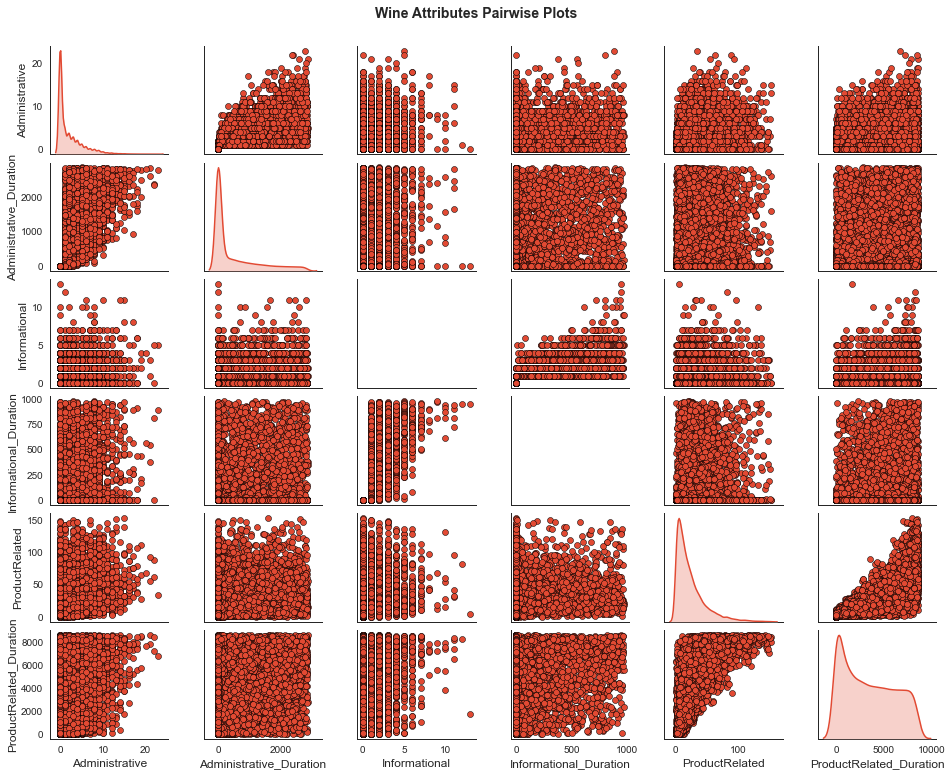

In [31]:
cols = ['Administrative',
        'Administrative_Duration',
        'Informational',
        'Informational_Duration',
        'ProductRelated',
        'ProductRelated_Duration']

pp = sns.pairplot(df[cols], 
                  size=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold')

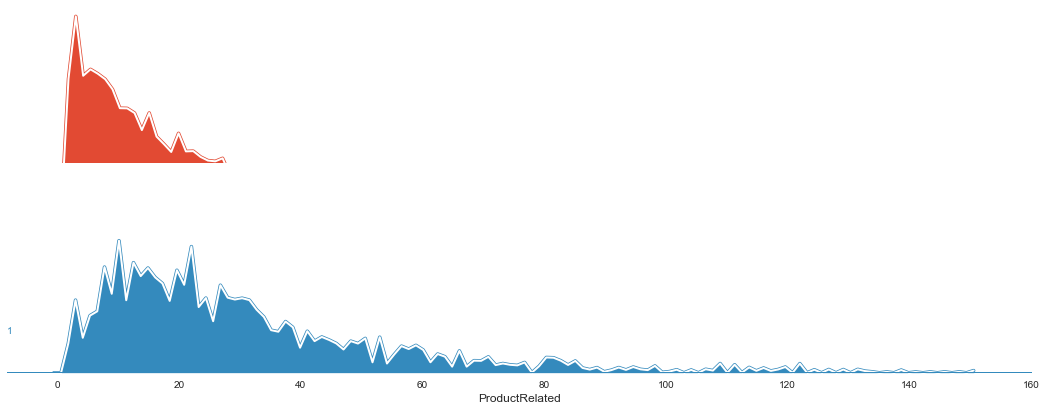

In [32]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="Revenue", hue="Revenue", aspect=5, height=3)

# # Draw the densities in a few steps
g.map(sns.kdeplot, "ProductRelated", shade=True, alpha=1, lw=3.5, bw=.2)
g.map(sns.kdeplot, "ProductRelated", color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2)

# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color=color, ha="left", va="center", transform=ax.transAxes)
g.map(label, "ProductRelated")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [33]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

In [34]:
import plotly.express as px

In [35]:
import plotly.express as px
fig = px.scatter_3d(df, x='BounceRates', y='ExitRates', z='Revenue',
                    color='Revenue', symbol='BounceRates')
fig.show()